In [6]:
# import common APIs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import cross_validation, naive_bayes, tree, svm, ensemble
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve
from xgboost import XGBClassifier

# Data observation

In [2]:
# Data observation
filepath = '/Users/mac/Desktop/Kaggle_datasets/Mushroom_classification/'
filename01 = 'mushrooms.csv'

df_full = pd.read_csv(os.path.join(filepath, filename01))
df_full.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df_full.info() #完全沒有numeric type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
df_full['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [5]:
df_full.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
df_encode = df_full.apply(LabelEncoder().fit_transform) 
df_encode.head() #1:p, 0:e

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


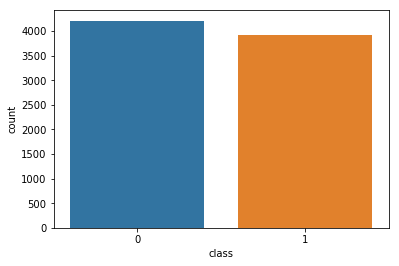

In [13]:
sns.countplot(df_encode['class'])

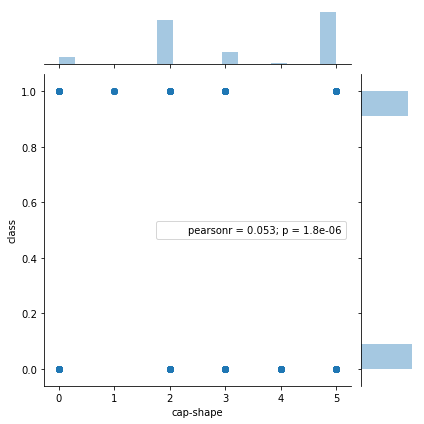

In [25]:
sns.jointplot(x="cap-shape", y="class", data=df_encode)

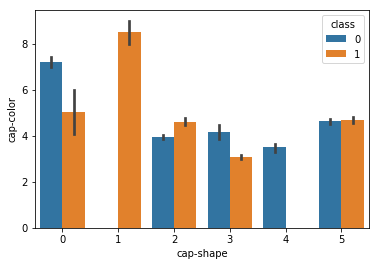

In [15]:
sns.barplot(x="cap-shape", y="cap-color", hue="class", data=df_encode)

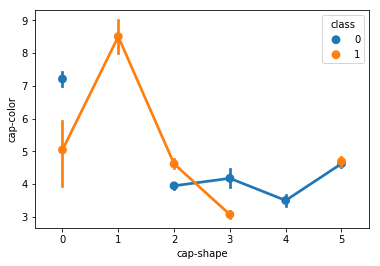

In [16]:
sns.pointplot(x="cap-shape", y="cap-color", hue="class", data=df_encode)

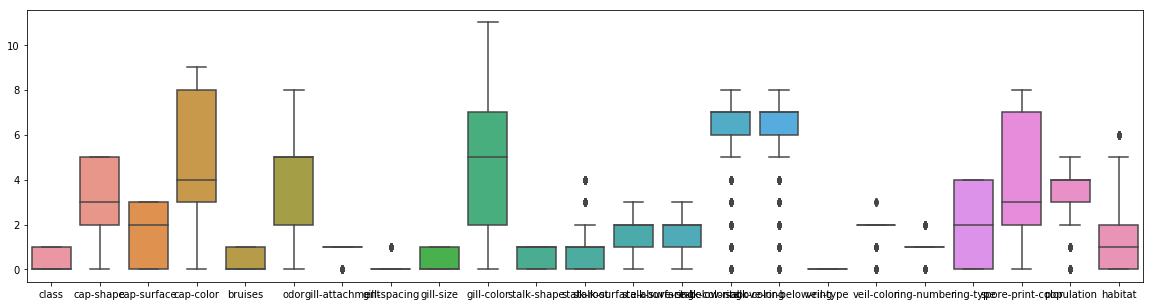

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_encode, orient="v");

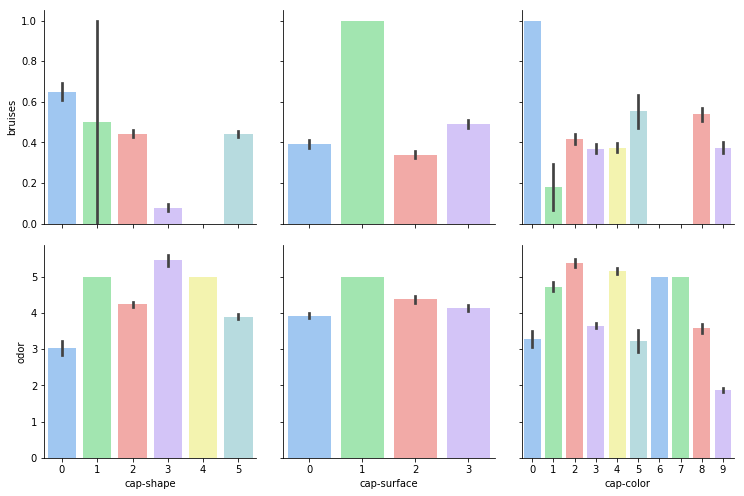

In [22]:
g = sns.PairGrid(df_encode,
                 x_vars=['cap-shape', 'cap-surface', 'cap-color'],
                 y_vars=['bruises', 'odor'],
                 aspect=1, size=3.5)
g.map(sns.barplot, palette="pastel");

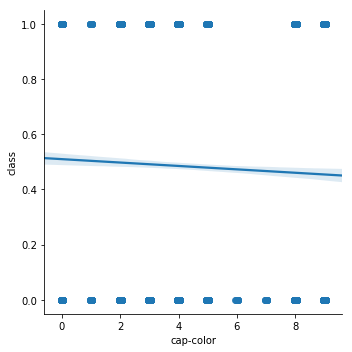

In [23]:
sns.lmplot(x="cap-color", y="class", data=df_encode, x_jitter=.05); #讓點不要overlap

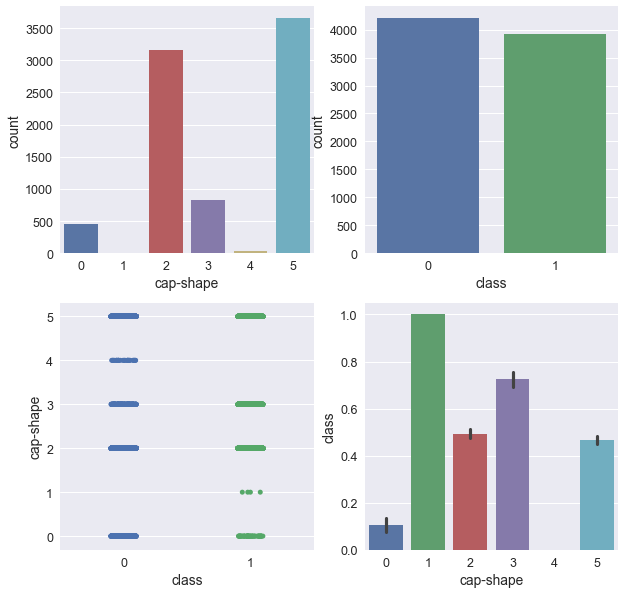

In [51]:
fig, ([axis1,axis2],[axis3,axis4]) = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='cap-shape', data=df_encode, ax=axis1)
sns.countplot(x='class', data=df_encode, ax=axis2)
sns.stripplot(x='class', y='cap-shape', data=df_encode, ax=axis3, jitter=True)
sns.barplot(x='cap-shape', y='class', data=df_encode, ax=axis4)
plt.show()

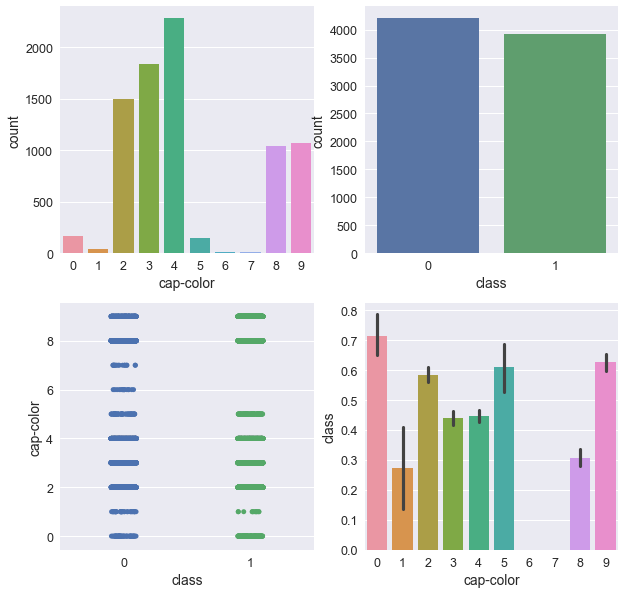

In [52]:
fig, ([axis1,axis2],[axis3,axis4]) = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='cap-color', data=df_encode, ax=axis1)
sns.countplot(x='class', data=df_encode, ax=axis2)
sns.stripplot(x='class', y='cap-color', data=df_encode, ax=axis3, jitter=True)
sns.barplot(x='cap-color', y='class', data=df_encode, ax=axis4)
plt.show()

In [10]:
df_dum = pd.get_dummies(df_full)
df_dum.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


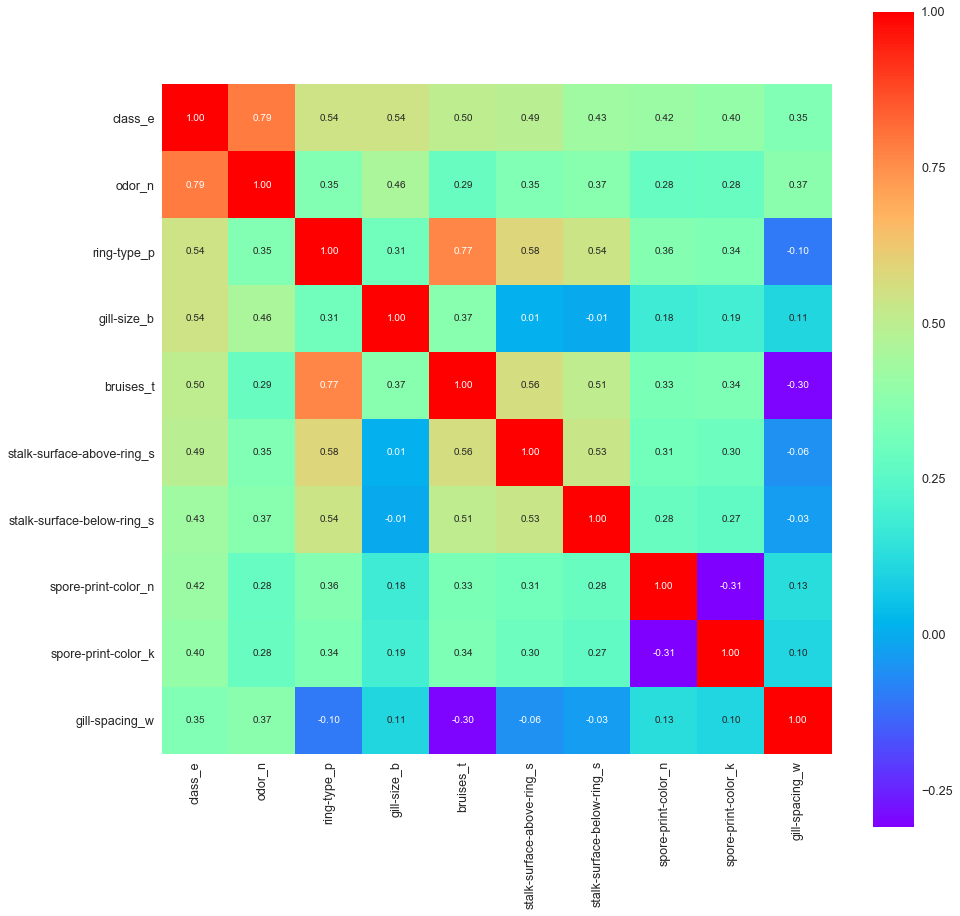

In [11]:
k = 10 #number of variables for heatmap
corrmat = df_dum.corr()
cols = corrmat.nlargest(k, 'class_e')['class_e'].index
cm = np.corrcoef(df_dum[cols].values.T)

plt.figure(figsize=(15,15)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values, cmap='rainbow')
#hm.xaxis.set_ticks_position('top')
plt.show()

# Data preprocessing

In [12]:
# Data preprocessing
from sklearn.utils import shuffle

shuffle_df = shuffle(df_encode, random_state=42)

df_label = shuffle_df['class']
df_feature = shuffle_df.drop('class', axis=1)

cut_point = round(len(df_encode)*0.6)
train_feature = np.array(df_feature.values[:cut_point,:])
train_label = np.array(df_label.values[:cut_point])
test_feature = np.array(df_feature.values[cut_point:,:])
test_label = np.array(df_label.values[cut_point:])

# PCA+KMeans

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(df_feature.values)
X

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.8403434 , -1.48615695, -0.19824983, ..., -0.2504706 ,
        -0.5143892 , -0.29572966],
       [-0.8403434 ,  0.14012794, -0.98389939, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       ..., 
       [-0.8403434 ,  0.95327039, -0.19824983, ..., -0.2504706 ,
         1.08304882,  1.44858865],
       [-0.21699152,  0.14012794, -0.98389939, ...,  1.42842641,
         0.28432981,  1.44858865],
       [-0.21699152, -1.48615695, -0.59107461, ...,  1.42842641,
        -1.31310821, -0.29572966]])

In [54]:
pca = PCA()
pca.fit_transform(X)

array([[  8.70753936e-01,   2.33666629e+00,  -2.16868007e+00, ...,
         -9.97442944e-02,  -1.62554003e-01,  -2.86447868e-17],
       [  3.40017168e+00,  -1.56856999e+00,   4.70612679e-01, ...,
          5.66695698e-02,  -9.25129956e-02,  -3.18481683e-17],
       [  2.87049086e+00,  -1.31094056e-01,   7.02394658e-01, ...,
         -2.11584415e-02,   2.49788834e-01,  -2.06702746e-17],
       ..., 
       [ -2.68888049e+00,  -1.55266689e+00,  -1.23415181e+00, ...,
          2.06784171e-01,  -7.28949136e-02,   1.07448746e-19],
       [  2.79678765e+00,  -8.08913039e-01,   7.93992159e-01, ...,
          5.47781513e-02,   1.53045535e-01,   7.81288188e-19],
       [  9.63017892e-01,   6.58426270e-01,  -2.05340788e+00, ...,
          2.64002933e-01,  -1.27547158e-02,   1.34793345e-18]])

In [66]:
covariance=pca.get_covariance()
#pd.DataFrame(covariance)

In [56]:
explained_variance= pca.explained_variance_
explained_variance

array([  3.87410924e+00,   2.60339434e+00,   2.40073834e+00,
         2.16674719e+00,   1.70303181e+00,   1.39495575e+00,
         9.78803667e-01,   9.51936841e-01,   7.70036405e-01,
         7.11748353e-01,   5.77556532e-01,   5.42484855e-01,
         5.09631267e-01,   4.77214086e-01,   3.84467203e-01,
         3.11228233e-01,   2.18649656e-01,   1.59514884e-01,
         1.31521687e-01,   7.31993474e-02,   6.16155691e-02,
         1.29548814e-33])

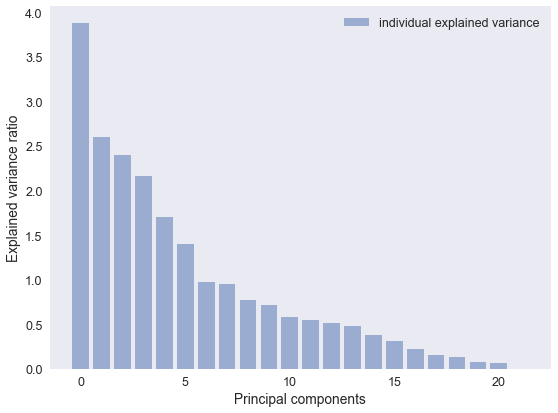

In [65]:
plt.figure(figsize=(8,6))
plt.bar(range(22), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.grid(False) 
plt.show()

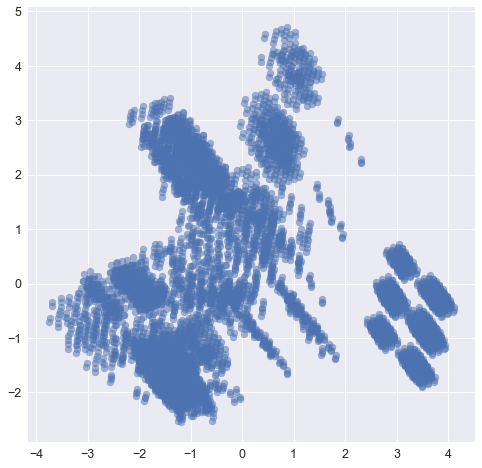

In [69]:
pca = PCA(n_components=2)
x = pca.fit_transform(X)
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1], alpha=0.5)
plt.show()

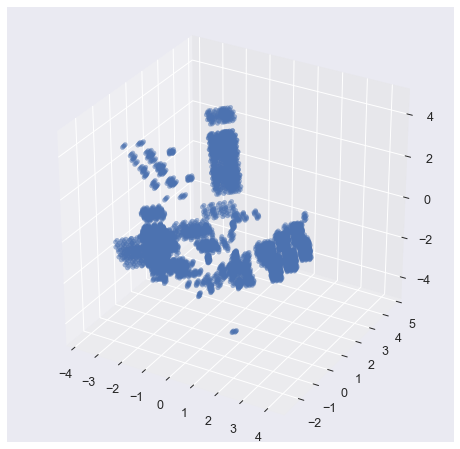

In [72]:
pca = PCA(n_components=3)
x = pca.fit_transform(X)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2], alpha=0.5)
plt.show()

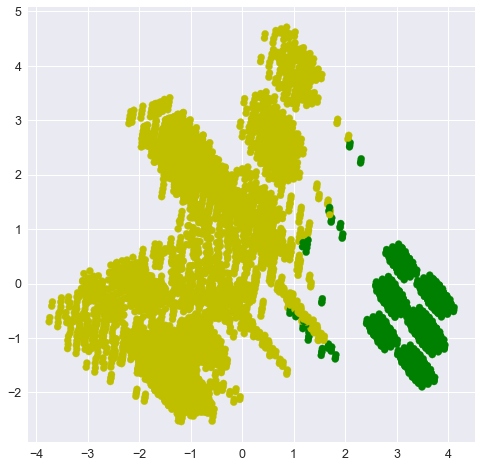

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(X)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

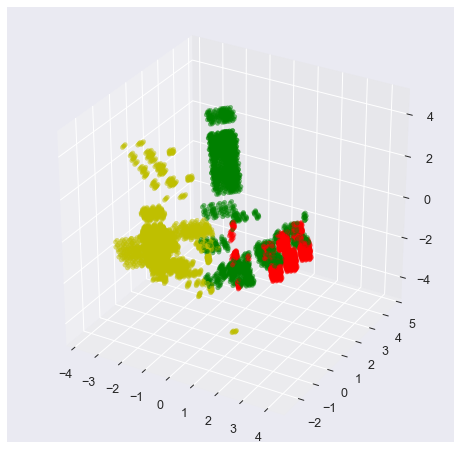

In [81]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=5)
X_clustered = kmeans.fit_predict(X)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2 : 'r'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2], c= label_color, alpha=0.5)
plt.show()

# Scikit-learn ML models: tree跟ensemble都可以達到100%準確！！

In [13]:
### naive_bayes.BernoulliNB()
from sklearn import cross_validation, naive_bayes
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.BernoulliNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:0.850841
Testing Score:0.845846

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       624
          1       0.88      0.80      0.84       595

avg / total       0.85      0.85      0.85      1219



             precision    recall  f1-score   support

          0       0.82      0.91      0.86      1713
          1       0.88      0.77      0.83      1537

avg / total       0.85      0.85      0.84      3250

[[1558  155]
 [ 346 1191]]


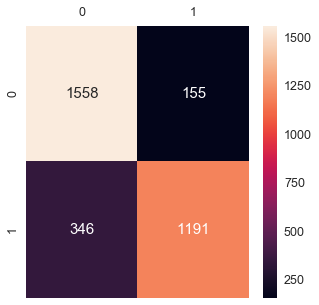

total_num:  3250
G1P1:  1558
G0P1:  155
G1P0:  346
G0P0:  1191
##########################
sensitivity:  0.818277310924
specificity:  0.774886141835
false_positive_rate:  0.115156017831
false_negative_rate:  0.181722689076


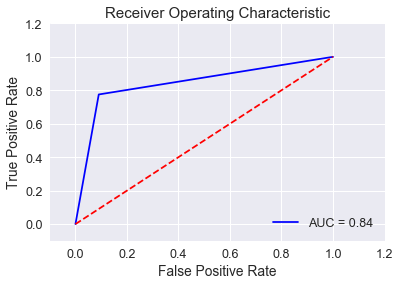

In [14]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
### naive_bayes.GaussianNB()
from sklearn import cross_validation, naive_bayes
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=naive_bayes.GaussianNB()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:0.915675
Testing Score:0.911385

             precision    recall  f1-score   support

          0       0.94      0.89      0.92       624
          1       0.89      0.94      0.92       595

avg / total       0.92      0.92      0.92      1219



             precision    recall  f1-score   support

          0       0.93      0.90      0.91      1713
          1       0.90      0.92      0.91      1537

avg / total       0.91      0.91      0.91      3250

[[1550  163]
 [ 125 1412]]


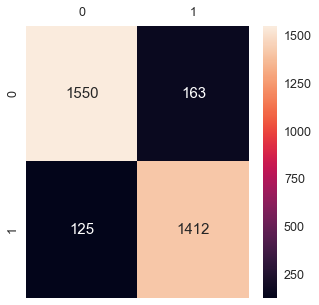

total_num:  3250
G1P1:  1550
G0P1:  163
G1P0:  125
G0P0:  1412
##########################
sensitivity:  0.925373134328
specificity:  0.918672739102
false_positive_rate:  0.103492063492
false_negative_rate:  0.0746268656716


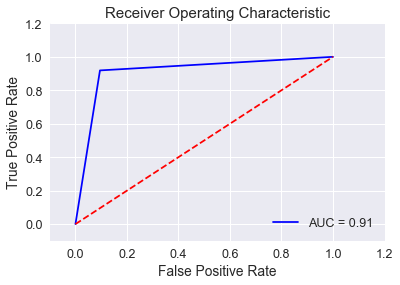

In [16]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
### tree.DecisionTreeClassifier()
from sklearn import cross_validation,tree
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:1.000000
Testing Score:1.000000

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       624
          1       1.00      1.00      1.00       595

avg / total       1.00      1.00      1.00      1219



             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1713
          1       1.00      1.00      1.00      1537

avg / total       1.00      1.00      1.00      3250

[[1713    0]
 [   0 1537]]


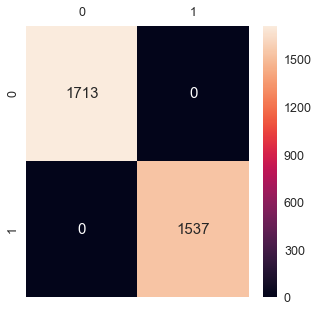

total_num:  3250
G1P1:  1713
G0P1:  0
G1P0:  0
G0P0:  1537
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.0
false_negative_rate:  0.0


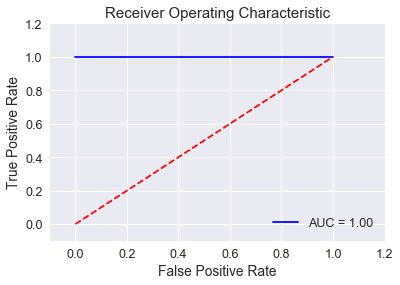

In [18]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
### svm.LinearSVC()
from sklearn import cross_validation,svm
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=svm.LinearSVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:0.951375
Testing Score:0.945846

             precision    recall  f1-score   support

          0       0.96      0.95      0.95       624
          1       0.94      0.96      0.95       595

avg / total       0.95      0.95      0.95      1219



             precision    recall  f1-score   support

          0       0.94      0.95      0.95      1713
          1       0.95      0.94      0.94      1537

avg / total       0.95      0.95      0.95      3250

[[1633   80]
 [  96 1441]]


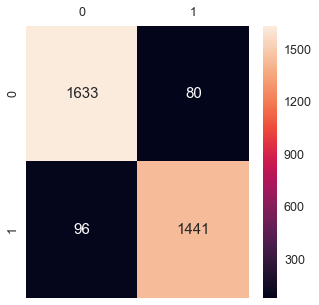

total_num:  3250
G1P1:  1633
G0P1:  80
G1P0:  96
G0P0:  1441
##########################
sensitivity:  0.944476576056
specificity:  0.93754066363
false_positive_rate:  0.0525969756739
false_negative_rate:  0.0555234239445


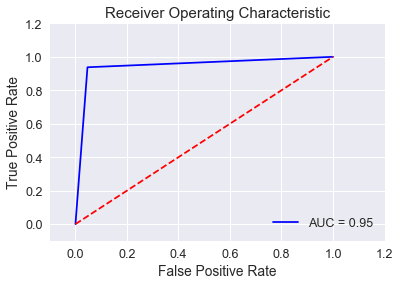

In [20]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
### svm.SVC()
from sklearn import cross_validation,svm
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=svm.SVC()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:0.999795
Testing Score:0.999077

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       624
          1       1.00      1.00      1.00       595

avg / total       1.00      1.00      1.00      1219



             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1713
          1       1.00      1.00      1.00      1537

avg / total       1.00      1.00      1.00      3250

[[1713    0]
 [   3 1534]]


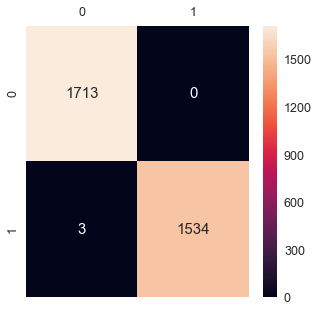

total_num:  3250
G1P1:  1713
G0P1:  0
G1P0:  3
G0P0:  1534
##########################
sensitivity:  0.998251748252
specificity:  0.998048145738
false_positive_rate:  0.0
false_negative_rate:  0.00174825174825


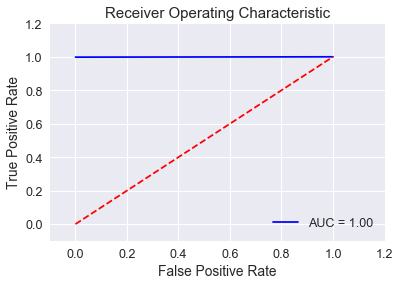

In [22]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
### ensemble.AdaBoostClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.AdaBoostClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:1.000000
Testing Score:1.000000

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       624
          1       1.00      1.00      1.00       595

avg / total       1.00      1.00      1.00      1219



             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1713
          1       1.00      1.00      1.00      1537

avg / total       1.00      1.00      1.00      3250

[[1713    0]
 [   0 1537]]


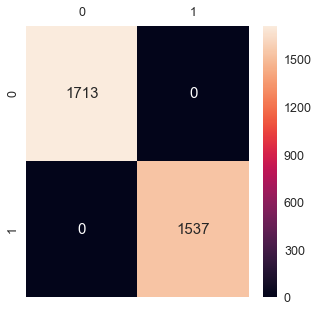

total_num:  3250
G1P1:  1713
G0P1:  0
G1P0:  0
G0P0:  1537
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.0
false_negative_rate:  0.0


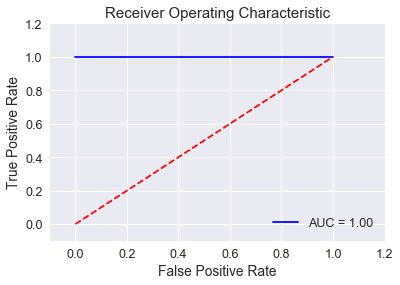

In [24]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [25]:
### ensemble.GradientBoostingClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.GradientBoostingClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:1.000000
Testing Score:1.000000

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       624
          1       1.00      1.00      1.00       595

avg / total       1.00      1.00      1.00      1219



             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1713
          1       1.00      1.00      1.00      1537

avg / total       1.00      1.00      1.00      3250

[[1713    0]
 [   0 1537]]


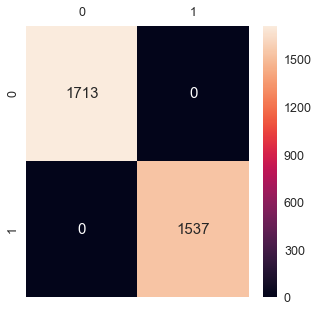

total_num:  3250
G1P1:  1713
G0P1:  0
G1P0:  0
G0P0:  1537
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.0
false_negative_rate:  0.0


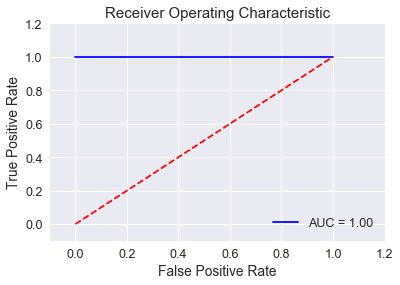

In [26]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
### ensemble.RandomForestClassifier()
from sklearn import cross_validation,ensemble
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:1.000000
Testing Score:1.000000

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       624
          1       1.00      1.00      1.00       595

avg / total       1.00      1.00      1.00      1219



             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1713
          1       1.00      1.00      1.00      1537

avg / total       1.00      1.00      1.00      3250

[[1713    0]
 [   0 1537]]


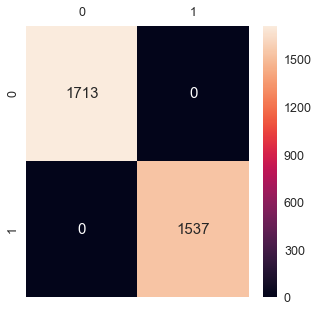

total_num:  3250
G1P1:  1713
G0P1:  0
G1P0:  0
G0P0:  1537
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.0
false_negative_rate:  0.0


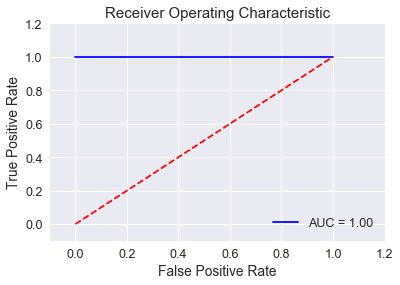

In [81]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# XGBClassifier()
from xgboost import XGBClassifier
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label) #分層取樣
clf=XGBClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature,train_label))
print("Testing Score:%f"%clf.score(test_feature,test_label))

y_predict = clf.predict(X_test)
print('\n'+classification_report(y_test,y_predict))

Traing Score:1.000000
Testing Score:1.000000

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       624
          1       1.00      1.00      1.00       595

avg / total       1.00      1.00      1.00      1219



             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1713
          1       1.00      1.00      1.00      1537

avg / total       1.00      1.00      1.00      3250

[[1713    0]
 [   0 1537]]


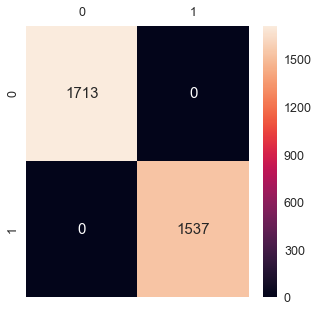

total_num:  3250
G1P1:  1713
G0P1:  0
G1P0:  0
G0P0:  1537
##########################
sensitivity:  1.0
specificity:  1.0
false_positive_rate:  0.0
false_negative_rate:  0.0


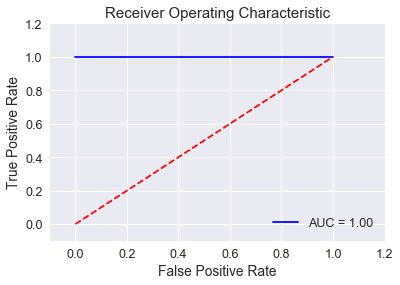

In [29]:
# confusion matrix
prediction2 = clf.predict(test_feature)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = test_label.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

# conf heatmap
conf = confusion_matrix(label2_list, prediction2_list)
f, ax= plt.subplots(figsize = (5, 5))
sns.heatmap(conf, annot=True, ax=ax, fmt='d') 
ax.xaxis.set_ticks_position('top') #Making x label be on top is common in textbooks.
plt.show()

# model_efficacy
def model_efficacy(conf):
    total_num = np.sum(conf)
    sen = conf[0][0]/(conf[0][0]+conf[1][0])
    spe = conf[1][1]/(conf[1][0]+conf[1][1])
    false_positive_rate = conf[0][1]/(conf[0][1]+conf[1][1])
    false_negative_rate = conf[1][0]/(conf[0][0]+conf[1][0])
    
    print('total_num: ',total_num)
    print('G1P1: ',conf[0][0]) #G = gold standard; P = prediction
    print('G0P1: ',conf[0][1])
    print('G1P0: ',conf[1][0])
    print('G0P0: ',conf[1][1])
    print('##########################')
    print('sensitivity: ',sen)
    print('specificity: ',spe)
    print('false_positive_rate: ',false_positive_rate)
    print('false_negative_rate: ',false_negative_rate)
    
    return total_num, sen, spe, false_positive_rate, false_negative_rate

conf = confusion_matrix(label2_list, prediction2_list)
model_efficacy(conf)

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(label2_list, prediction2_list)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()